In [1]:
# work notebook for the issue : 
# Add Multiplicative Models/Seasonals #178 
# https://github.com/antoinecarme/pyaf/issues/178


gDecompositionType = "TS+R"

import pyaf.ForecastEngine as autof
import pyaf.Bench.TS_datasets as tsds

import pandas as pd

df = pd.read_csv("../../data/monthly-australian-wine-sales.csv")

import datetime
df['month'] = df['month'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))

#df.tail(10)
#df[:-10].tail()
#df[:-10:-1]
#df.describe()


(         month  sales
 0   1980-01-01  15136
 1   1980-02-01  16733
 2   1980-03-01  20016
 3   1980-04-01  17708
 4   1980-05-01  18019
 ..         ...    ...
 171 1994-04-01  26323
 172 1994-05-01  23779
 173 1994-06-01  27549
 174 1994-07-01  29660
 175 1994-08-01  23356
 
 [176 rows x 2 columns],
 <AxesSubplot:xlabel='month'>)

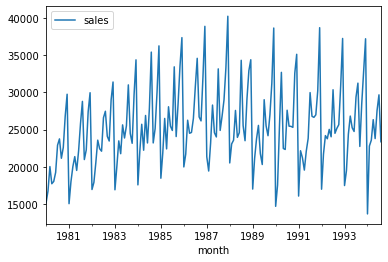

In [2]:
df, df.plot(x='month', y='sales')

INFO:pyaf.std:START_TRAINING 'sales'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['sales']' 1.7827816009521484
INFO:pyaf.std:TIME_DETAIL TimeVariable='month' TimeMin=1980-01-01T00:00:00.000000 TimeMax=1990-01-01T00:00:00.000000 TimeDelta=<DateOffset: months=1> Horizon=24
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='sales' Length=176  Min=13652 Max=40226  Mean=25392.147727272728 StdDev=5325.627485521334
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_sales' Min=13652 Max=40226  Mean=25392.147727272728 StdDev=5325.627485521334
INFO:pyaf.std:DECOMPOSITION_TYPE 'TS+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_sales_ConstantTrend_residue_Seasonal_MonthOfYear_residue_NoAR' [ConstantTrend * Seasonal_MonthOfYear + NoAR]
INFO:pyaf.std:TREND_DETAIL '_sales_ConstantTrend' [ConstantTrend]
INFO:pyaf.std:CYCLE_DETAIL '_sales_ConstantTrend_residue_Seasonal_MonthOfYear' [Seasonal_MonthOfYear]
INFO:pyaf.std:AUTOREG_DETAIL '_sales_ConstantTre

  Split Transformation                                              Model  \
0  None         _sales  _sales_ConstantTrend_residue_Seasonal_MonthOfY...   
1  None         _sales  _sales_ConstantTrend_residue_bestCycle_byMAPE_...   
2  None         _sales  _sales_ConstantTrend_residue_Seasonal_MonthOfY...   
3  None         _sales  _sales_ConstantTrend_residue_bestCycle_byMAPE_...   
4  None         _sales  _sales_PolyTrend_residue_Seasonal_MonthOfYear_...   

                                           Category  Complexity  FitMAPE  \
0  NoTransf_ConstantTrend_Seasonal_MonthOfYear_NoAR          12   0.0912   
1              NoTransf_ConstantTrend_Cycle_12_NoAR          12   0.0912   
2    NoTransf_ConstantTrend_Seasonal_MonthOfYear_AR          42   0.0912   
3                NoTransf_ConstantTrend_Cycle_12_AR          42   0.0912   
4      NoTransf_PolyTrend_Seasonal_MonthOfYear_NoAR          15   0.0615   

   ForecastMAPE  TestMAPE  
0        0.0729    0.0762  
1        0.0729    0.076

INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 1.7297031879425049


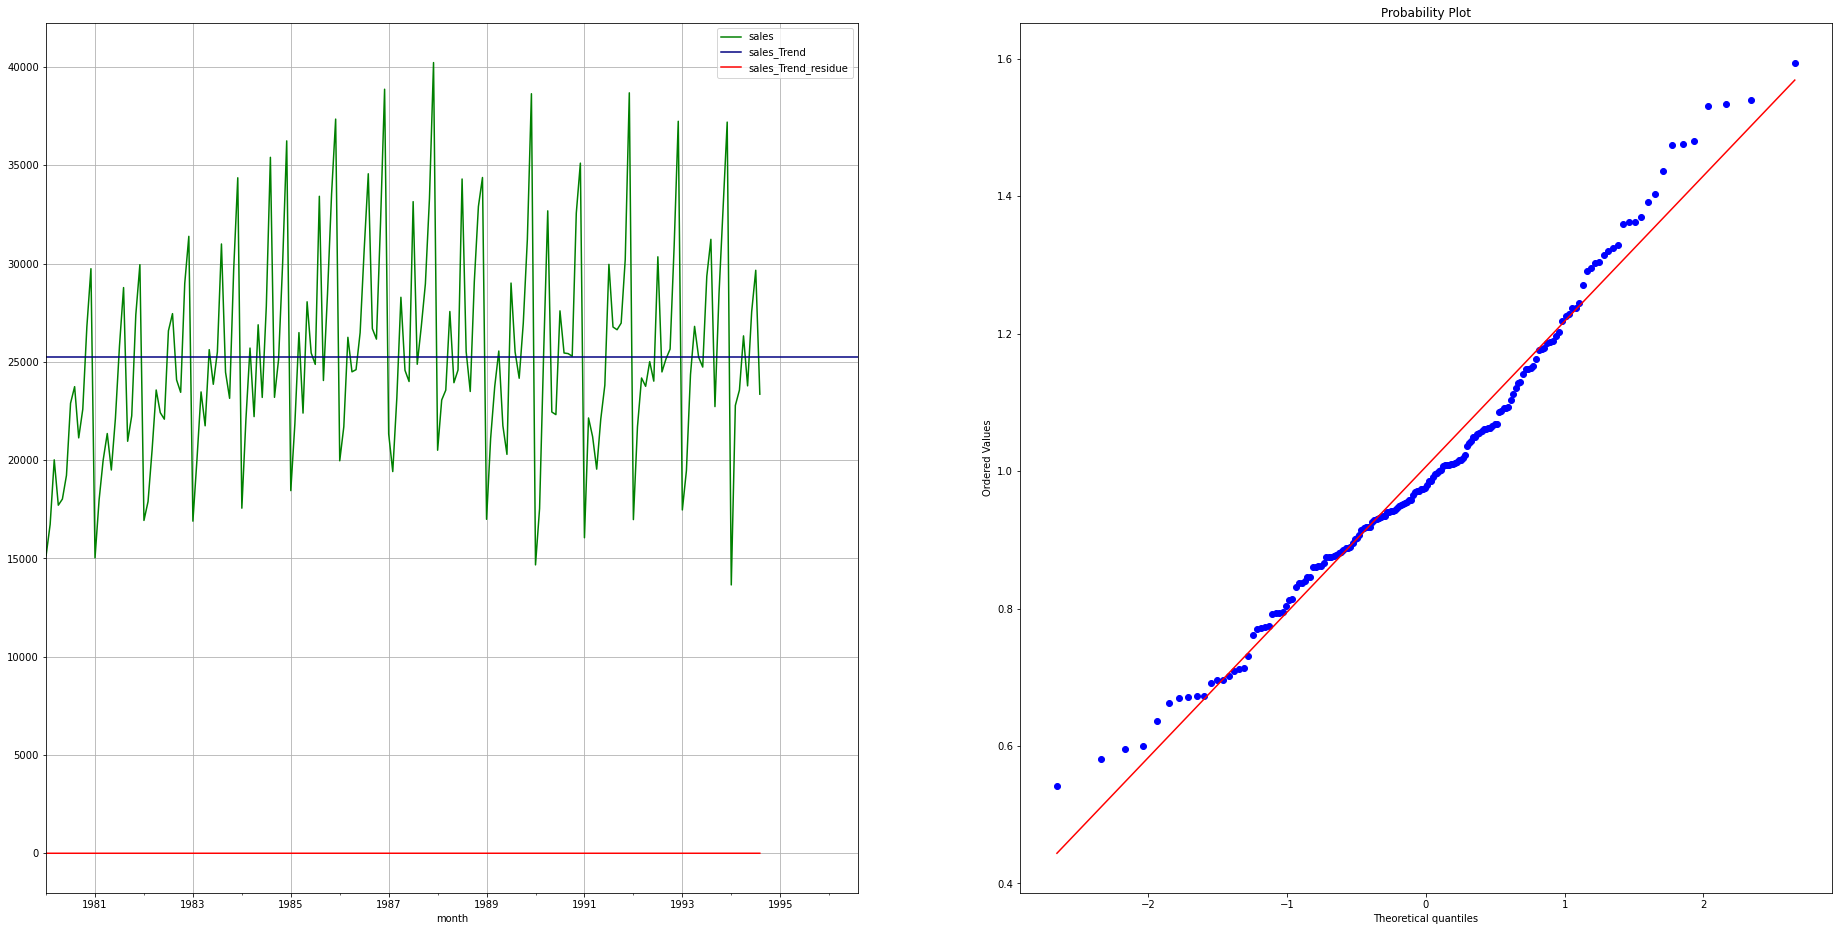

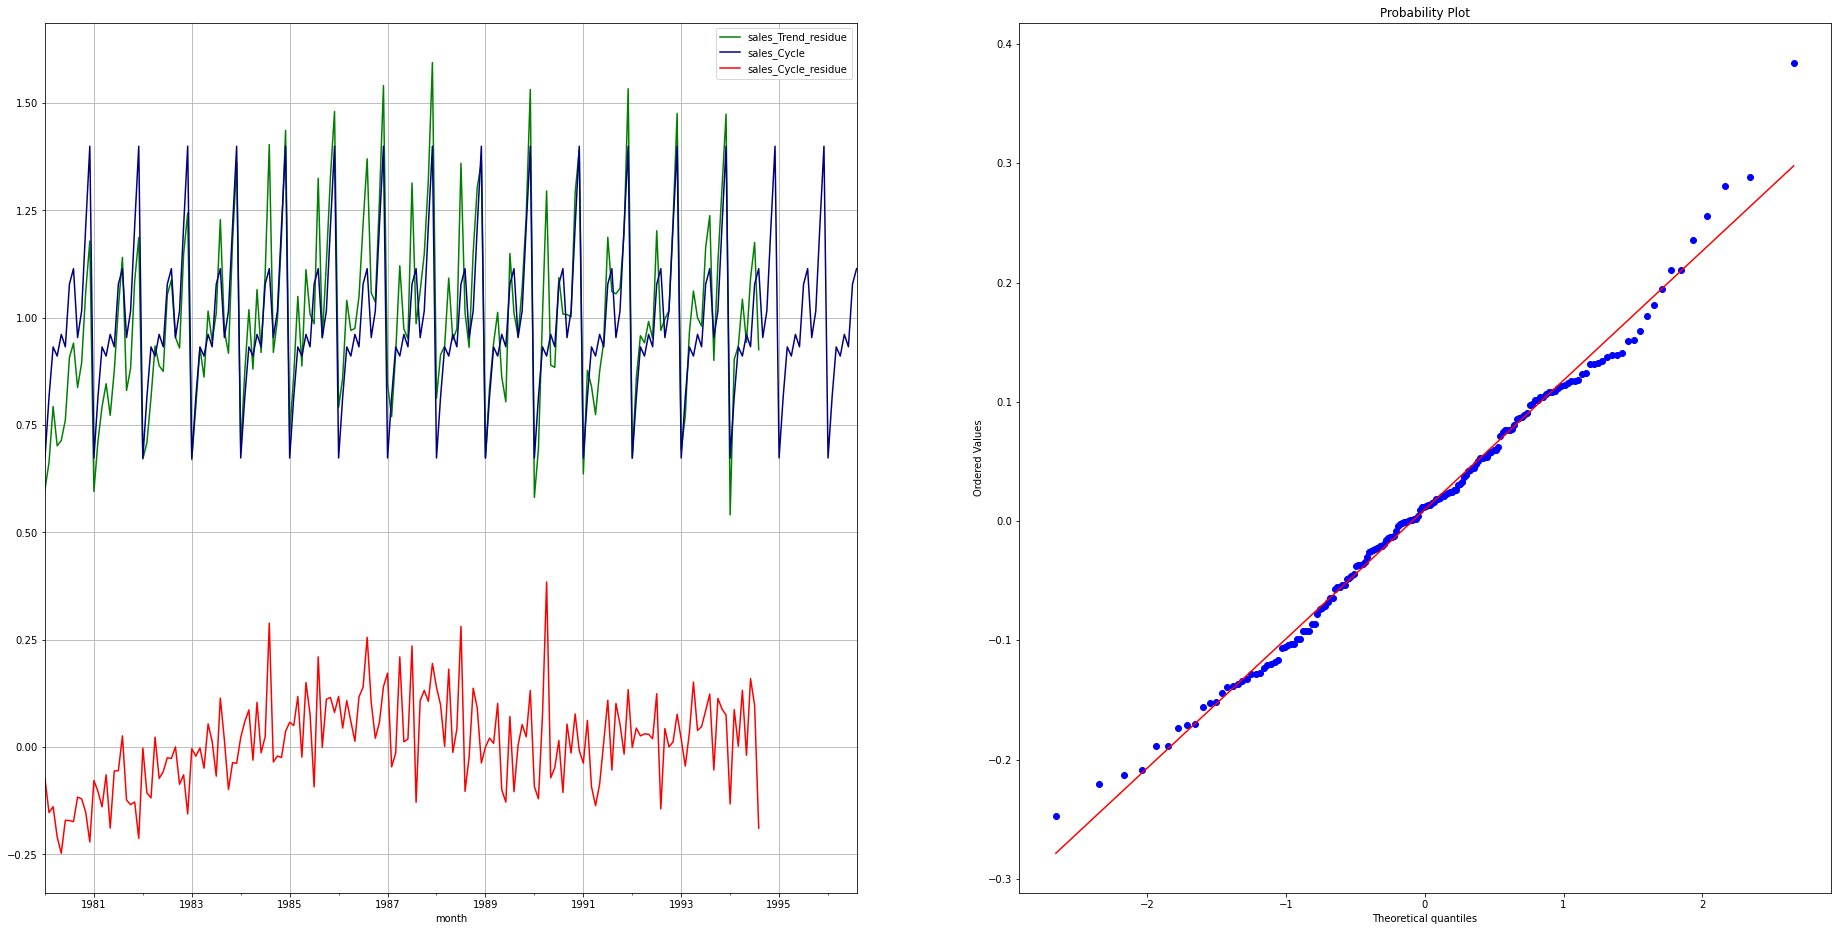

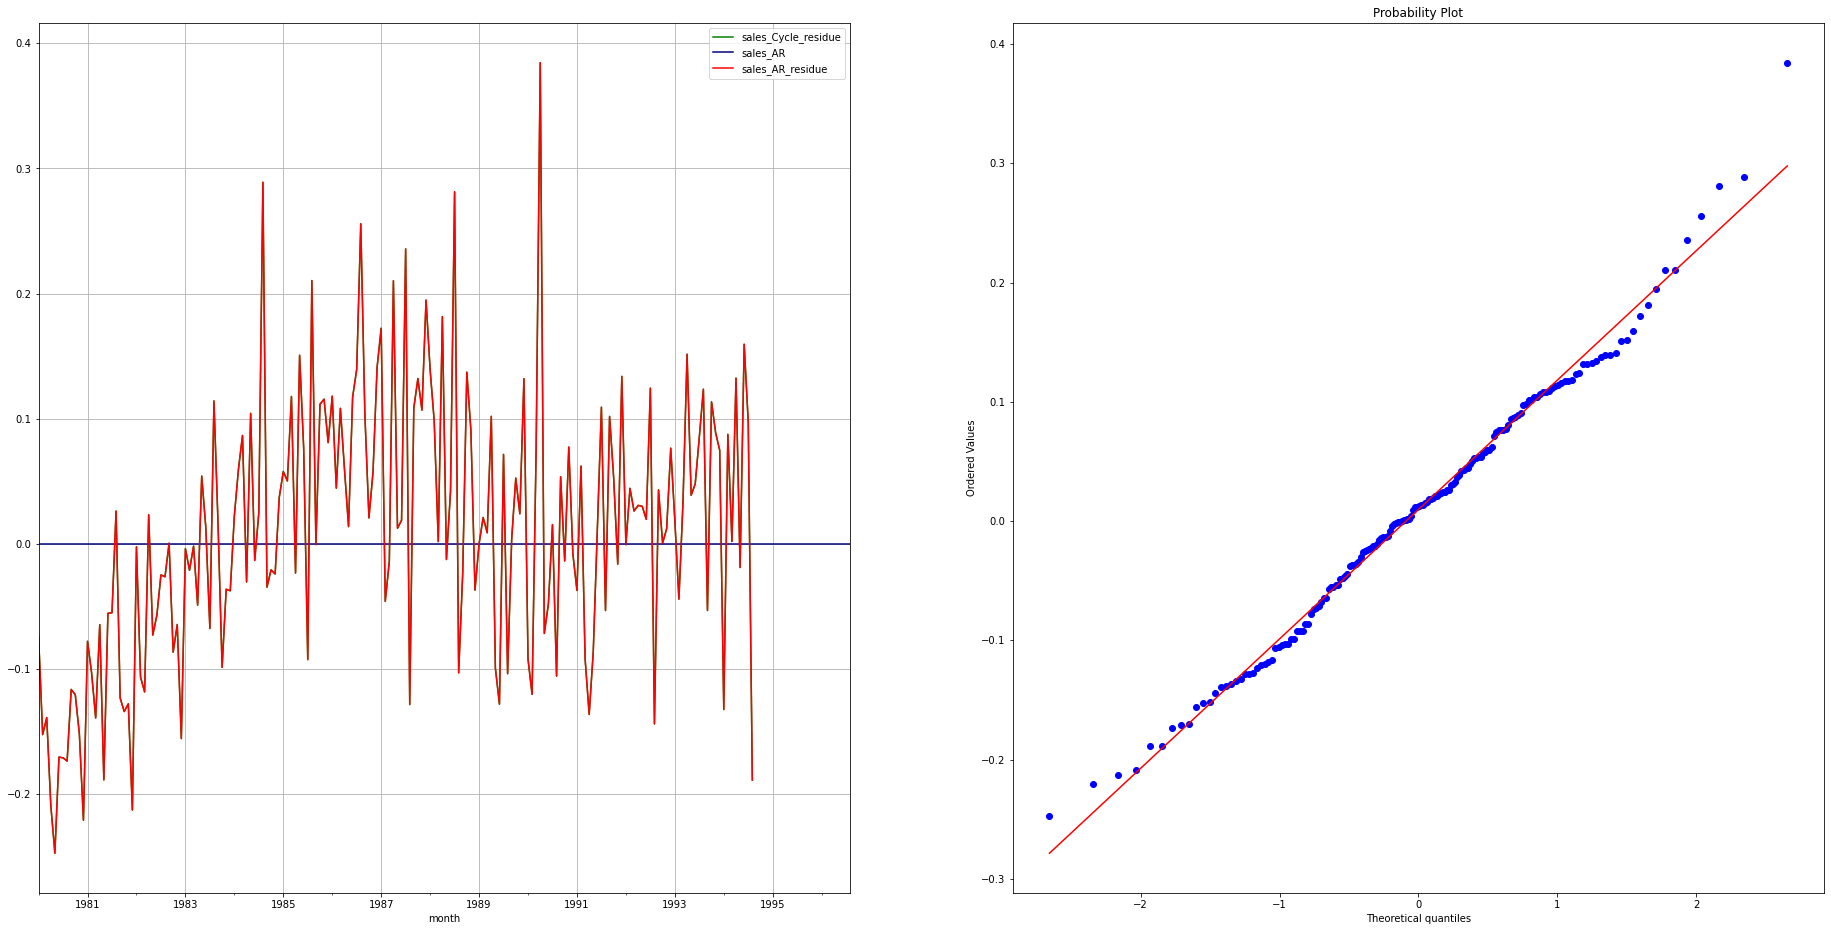

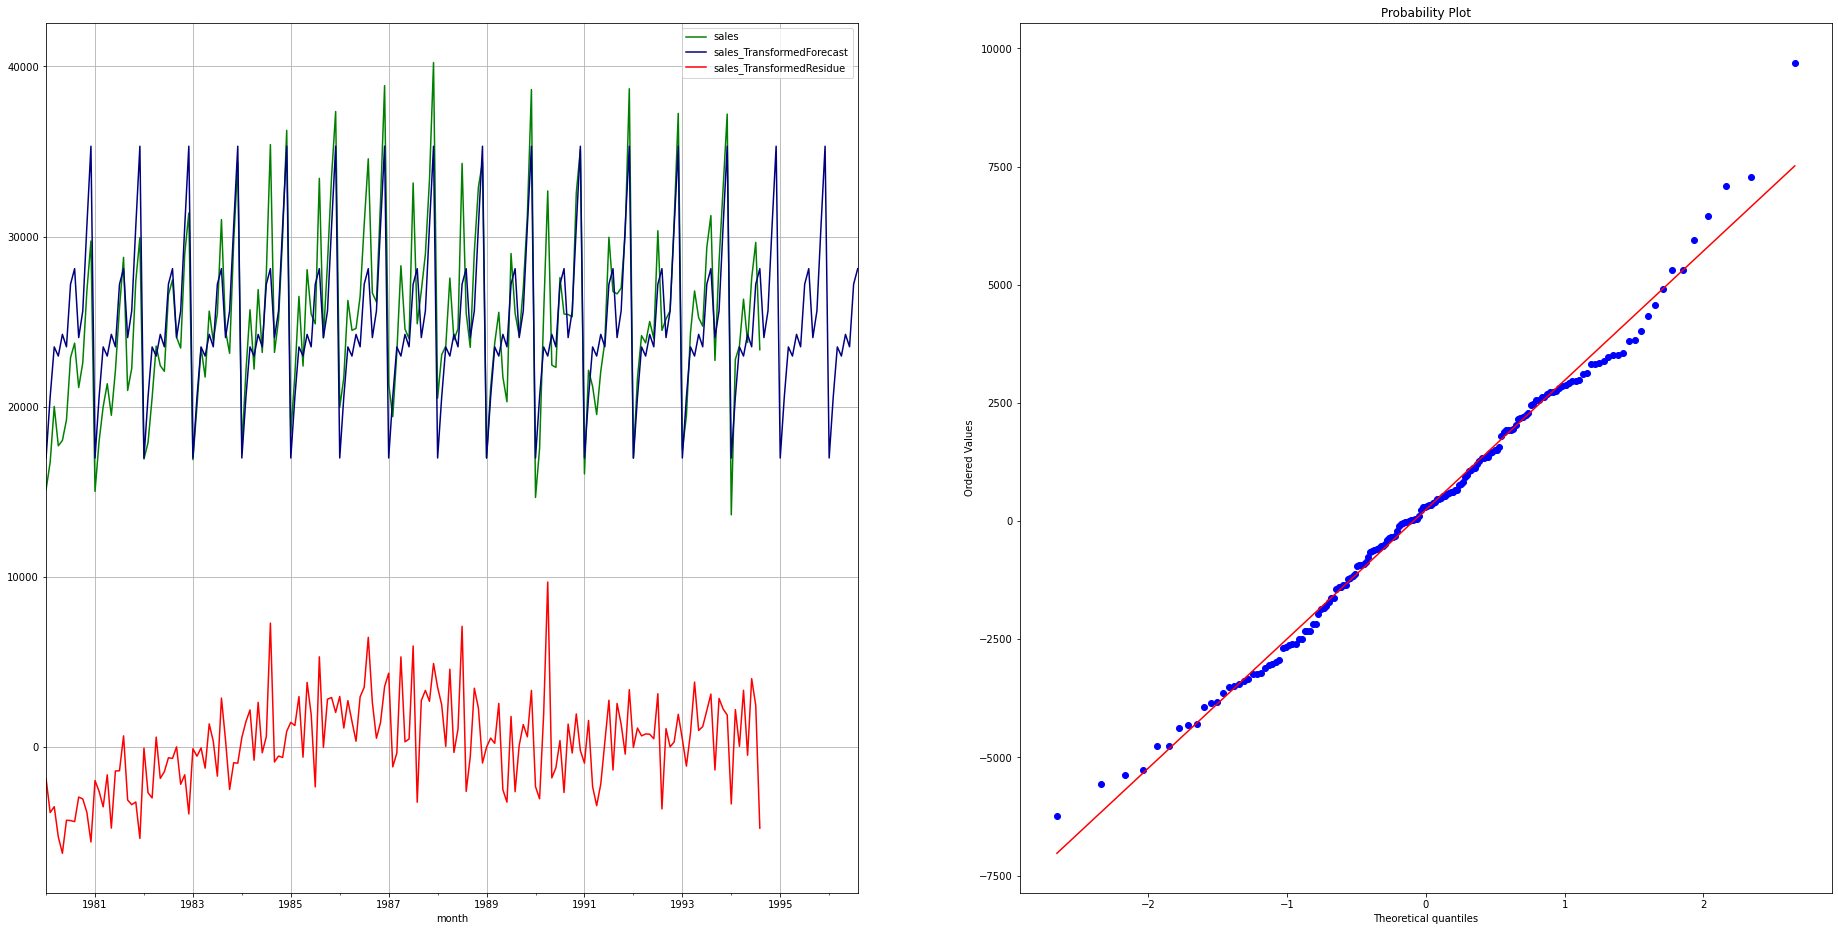

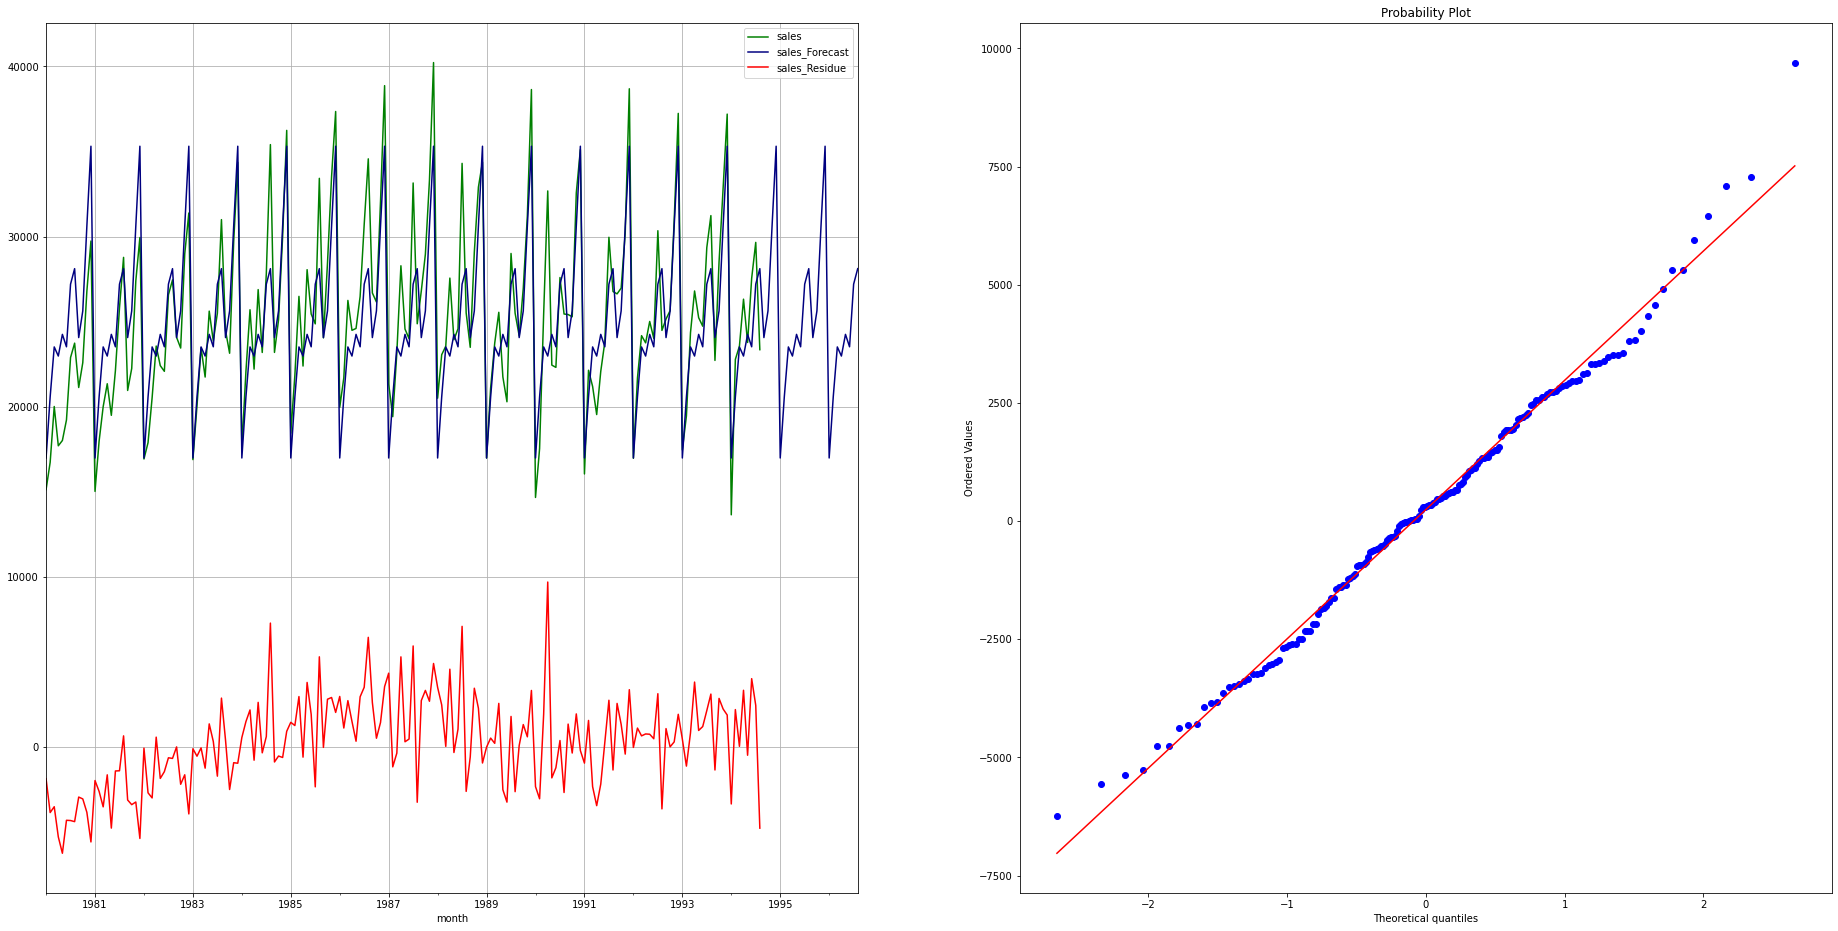

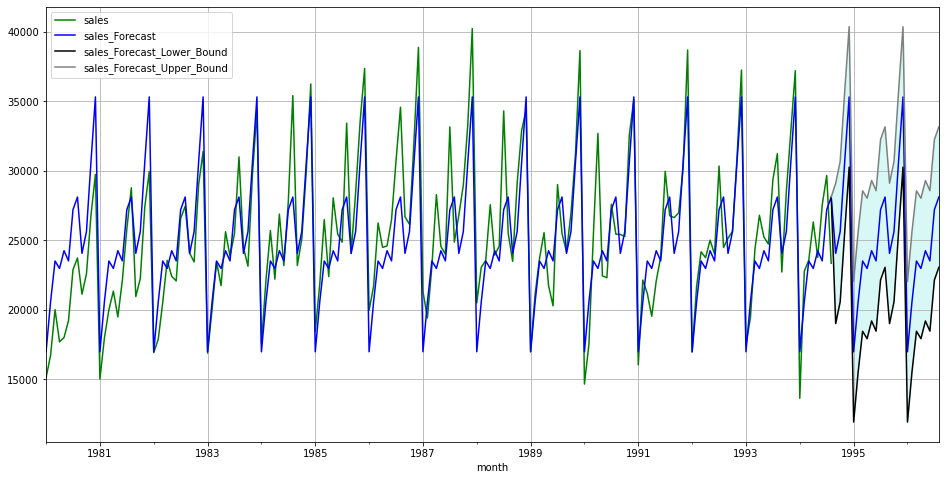

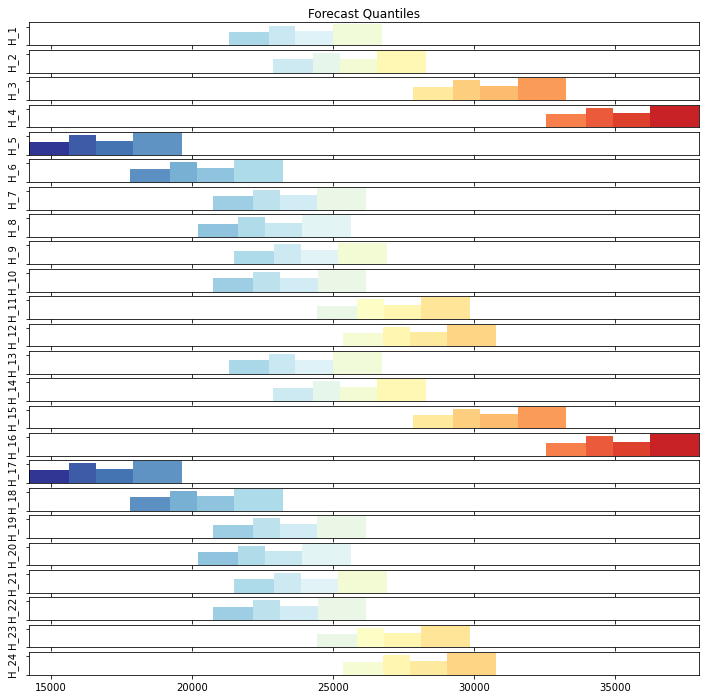

In [3]:


lEngine = autof.cForecastEngine()
lEngine.mOptions.set_active_decomposition_types([ gDecompositionType ]);

lEngine

H = 24
# lEngine.mOptions.enable_slow_mode();
# lEngine.mOptions.mDebugPerformance = True;
lEngine.train(df , "month" , "sales", H);
lEngine.getModelInfo();
print(lEngine.mSignalDecomposition.mTrPerfDetails.head());

lEngine.mSignalDecomposition.mBestModel.mTimeInfo.mResolution

lEngine.standardPlots();


In [4]:

dfapp_in = df.copy();
dfapp_in.tail()

#H = 12
dfapp_out = lEngine.forecast(dfapp_in, H);
#dfapp_out.to_csv("outputs/ozone_apply_out.csv")
dfapp_out.tail(2 * H)
print("Forecast Columns " , dfapp_out.columns);
Forecast_DF = dfapp_out[['month' , 'sales', 'sales' + '_Forecast']]
print(Forecast_DF.info())
print("Forecasts\n" , Forecast_DF.tail(H));

print("\n\n<ModelInfo>")
print(lEngine.to_json());
print("</ModelInfo>\n\n")
print("\n\n<Forecast>")
print(Forecast_DF.tail(2*H).to_json(date_format='iso'))
print("</Forecast>\n\n")


INFO:pyaf.std:START_FORECASTING '['sales']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['sales']' 0.32269787788391113


Forecast Columns  Index(['month', 'sales', 'row_number', 'month_Normalized', '_sales',
       '_sales_ConstantTrend', '_sales_ConstantTrend_residue',
       '_sales_ConstantTrend_residue_Seasonal_MonthOfYear',
       '_sales_ConstantTrend_residue_Seasonal_MonthOfYear_residue',
       '_sales_ConstantTrend_residue_Seasonal_MonthOfYear_residue_NoAR',
       '_sales_ConstantTrend_residue_Seasonal_MonthOfYear_residue_NoAR_residue',
       '_sales_Trend', '_sales_Trend_residue', '_sales_Cycle',
       '_sales_Cycle_residue', '_sales_AR', '_sales_AR_residue',
       '_sales_TransformedForecast', 'sales_Forecast',
       '_sales_TransformedResidue', 'sales_Residue',
       'sales_Forecast_Lower_Bound', 'sales_Forecast_Upper_Bound',
       'sales_Forecast_Quantile_10', 'sales_Forecast_Quantile_30',
       'sales_Forecast_Quantile_50', 'sales_Forecast_Quantile_70',
       'sales_Forecast_Quantile_90'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199